In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("steam_updated.csv")
df.head()

,Unnamed: 0,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,...,negative_ratings,average_playtime,median_playtime,owners,price,windows,linux,mac,rating,totalRatings
0,0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,...,3339,17612,317,15000000.0,7.19,1,1,1,97.388815,127873
1,1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,...,633,277,62,7500000.0,3.99,1,1,1,83.978740,3951
2,2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,...,398,187,34,7500000.0,3.99,1,1,1,89.564761,3814
3,3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,...,267,258,184,7500000.0,3.99,1,1,1,82.662338,1540
4,4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,...,288,624,415,7500000.0,3.99,1,1,1,94.799567,5538


<AxesSubplot:xlabel='positive_ratings', ylabel='average_playtime'>

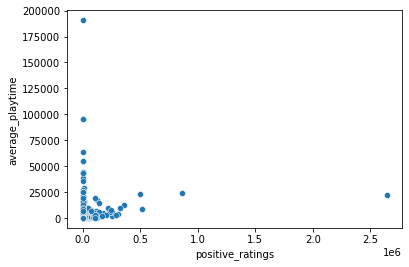

In [2]:
sns.scatterplot(data=df, x="positive_ratings", y="average_playtime")

## KMEANS COM AVERAGE_PLAYTIME E POSITVE_RATINGS (DADOS NORMALIZADOS)

In [3]:
df_group = df[['average_playtime',"positive_ratings"]]

In [4]:
x_scaled = MinMaxScaler().fit_transform(df_group)
df_group = pd.DataFrame(x_scaled)

In [5]:
df_group.columns = ['average_playtime', 'positive_ratings']
df_group

,average_playtime,positive_ratings
0,0.092391,4.709341e-02
1,0.001453,1.254725e-03
2,0.000981,1.291784e-03
3,0.001353,4.813939e-04
4,0.003273,1.985324e-03
...,...,...
27068,0.000000,1.134471e-06
27069,0.000000,3.025256e-06
27070,0.000000,0.000000e+00
27071,0.000000,7.563141e-07


In [6]:
kmeans = KMeans(n_clusters=3)

In [7]:
kmeans.fit(df_group)

KMeans(n_clusters=3)

In [8]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='average_playtime', ylabel='positive_ratings'>

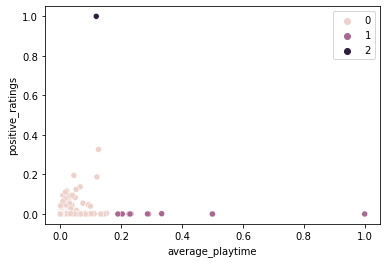

In [9]:
sns.scatterplot(data=df_group, x='average_playtime', y='positive_ratings', hue=kmeans.labels_)

## KMEANS COM PRICE E RATING

In [10]:
df_group2 = df[['price','rating']]

In [11]:
filter_df = df[['price','rating']] > 0
filter_df = df['rating'] < 100
df_group2 = df_group2[filter_df]

In [12]:
df_group2.dropna()
df_group2.head()

,price,rating
0,7.19,97.388815
1,3.99,83.978740
2,3.99,89.564761
3,3.99,82.662338
4,3.99,94.799567


In [13]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_group2)

KMeans(n_clusters=6)

<AxesSubplot:xlabel='price', ylabel='rating'>

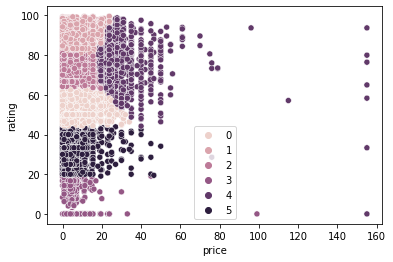

In [14]:
sns.scatterplot(data=df_group2, x='price', y='rating', hue=kmeans.labels_)

## KMEANS COM TOTALRATINGS E RATING

In [15]:
df_group3 = df[['totalRatings','rating']]
df_group3 = df_group3[df_group3.rating>0]
df_group3 = df_group3[df_group3.totalRatings>0]
df_group3.describe()

,totalRatings,rating
count,2.640600e+04,26406.000000
mean,1.242221e+03,73.252813
std,2.271061e+04,20.670170
min,1.000000e+00,1.176471
25%,1.100000e+01,60.000000
50%,3.800000e+01,76.923077
75%,1.860000e+02,89.760131
max,3.046717e+06,100.000000


In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group3)

KMeans(n_clusters=3)

<AxesSubplot:xlabel='totalRatings', ylabel='rating'>

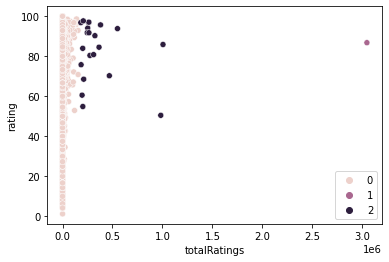

In [17]:
sns.scatterplot(data=df_group3, x='totalRatings', y='rating', hue=kmeans.labels_)